In [78]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import datetime as dt
from datetime import timedelta
from statsmodels.tsa.api import Holt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [37]:
df_1 = pd.read_csv("Country_wide_COVID 19_Datasets.csv",parse_dates=["Date"])

df_1.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [38]:
df_1.shape

(6603, 9)

In [39]:
df_2 = pd.read_csv("Auxiliary_table.csv")

df_2.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [40]:
df_2.shape 

(213, 4)

In [41]:
df_1.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [42]:
df_1["Country"].value_counts()

Jordan                   31
Saint Martin             31
Fiji                     31
Mauritania               31
Iceland                  31
                         ..
Russia                   31
Italy                    31
Sao Tome and Principe    31
Kyrgyzstan               31
Hong Kong                31
Name: Country, Length: 213, dtype: int64

In [43]:
df_1["Date"].value_counts()

2020-05-01    213
2020-04-20    213
2020-05-10    213
2020-04-27    213
2020-05-06    213
2020-04-23    213
2020-05-15    213
2020-05-02    213
2020-04-19    213
2020-05-11    213
2020-04-28    213
2020-05-07    213
2020-04-24    213
2020-05-16    213
2020-05-03    213
2020-05-12    213
2020-05-14    213
2020-04-29    213
2020-05-08    213
2020-04-25    213
2020-05-17    213
2020-05-04    213
2020-04-21    213
2020-05-13    213
2020-04-30    213
2020-05-09    213
2020-04-26    213
2020-05-18    213
2020-05-05    213
2020-04-22    213
2020-04-18    213
Name: Date, dtype: int64

In [44]:
df_1.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases'],
      dtype='object')

In [45]:
# Grouping different types of cases as per the date

datewise = df_1.groupby(["Date"]).agg({"Total Tests":"sum","Total Cases":"sum","Total Deaths":"sum",
                                       "Total Deaths":"sum","Total Recovered":"sum","Serious or Critical":"sum",
                                       "Active Cases":"sum"})

In [46]:
datewise

,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Date,,,,,,
2020-04-18,19847624.0,2330045.0,160032.0,595244.0,55258.0,1574175.0
2020-04-19,20565761.0,2405050.0,164994.0,623676.0,54218.0,1615786.0
2020-04-20,21597361.0,2479782.0,170382.0,645090.0,56756.0,1663716.0
2020-04-21,22614613.0,2555027.0,177444.0,688988.0,57247.0,1688001.0
2020-04-22,23334041.0,2634998.0,184051.0,716205.0,56682.0,1734148.0
2020-04-23,24427775.0,2716085.0,190513.0,744174.0,58692.0,1780804.0
2020-04-24,25574910.0,2827896.0,197076.0,797132.0,58527.0,1833094.0
2020-04-25,26861236.0,2918683.0,203149.0,835373.0,58198.0,1879567.0
2020-04-26,27975924.0,2992542.0,206900.0,876172.0,57596.0,1908876.0


In [47]:
print("Basic Information")
print("#"*60)
print("Number of Total Tests  around the world as on 2020/05/18 :",datewise["Total Tests"].iloc[-1])
print("Total number of Confirmed cases around the world as on 2020/05/18 :",datewise["Total Cases"].iloc[-1])
print("Total number of Deaths around the world as on 2020/05/18 :",datewise["Total Deaths"].iloc[-1])
print("Total number of  Recovered cases around the world as on 2020/05/18 :",datewise["Total Recovered"].iloc[-1])
print("Total number of Serious or Critical cases around the world as on 2020/05/18 :",datewise["Serious or Critical"].iloc[-1])
print("Total number of Active cases around the world as on 2020/05/18 :",datewise["Active Cases"].iloc[-1])
print("Total number of Closed cases around the world as on 2020/05/18 :",
      datewise["Total Recovered"].iloc[-1]+datewise["Total Deaths"].iloc[-1])

Basic Information
############################################################
Number of Total Tests  around the world as on 2020/05/18 : 60958752.0
Total number of Confirmed cases around the world as on 2020/05/18 : 4887403.0
Total number of Deaths around the world as on 2020/05/18 : 319950.0
Total number of  Recovered cases around the world as on 2020/05/18 : 1904016.0
Total number of Serious or Critical cases around the world as on 2020/05/18 : 44760.0
Total number of Active cases around the world as on 2020/05/18 : 2413380.0
Total number of Closed cases around the world as on 2020/05/18 : 2223966.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

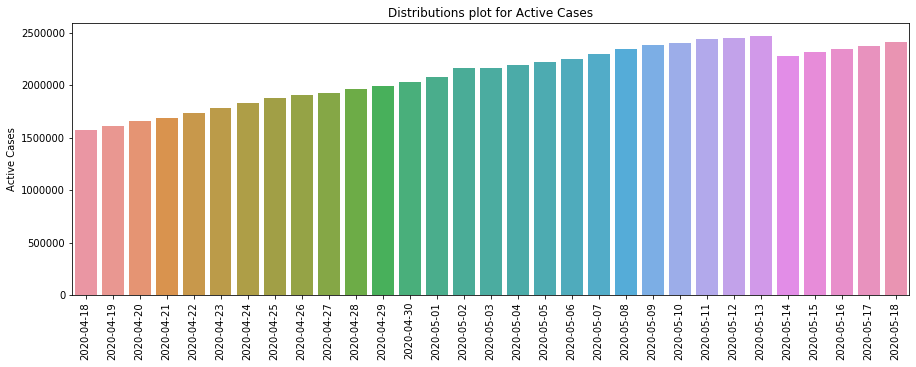

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Active Cases"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

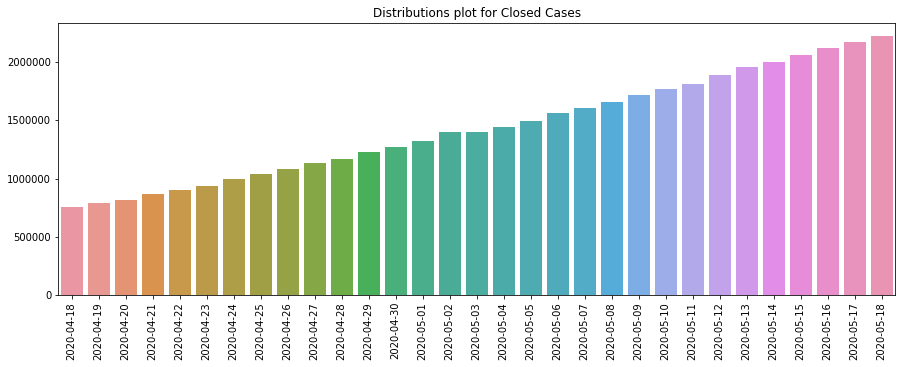

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Total Recovered"]+datewise["Total Deaths"])
plt.title("Distributions plot for Closed Cases")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Weekly progress of different types of cases')

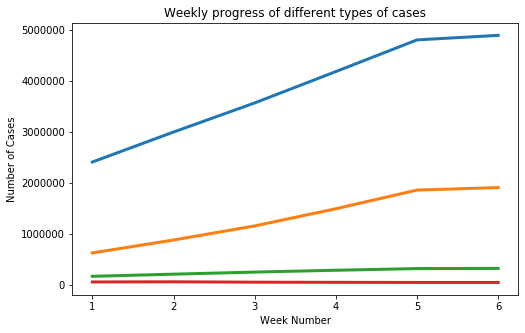

In [50]:
datewise["WeekofYear"] = datewise.index.weekofyear

week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
weekwise_serious = []
w = 1

for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Total Cases"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Total Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Total Deaths"].iloc[-1])
    weekwise_serious.append(datewise[datewise["WeekofYear"]==i]["Serious or Critical"].iloc[-1])
    week_num.append(w)
    w=w+1

plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.plot(week_num,weekwise_serious,linewidth=3)
plt.xlabel("Week Number")
plt.ylabel("Number of Cases")
plt.title("Weekly progress of different types of cases")

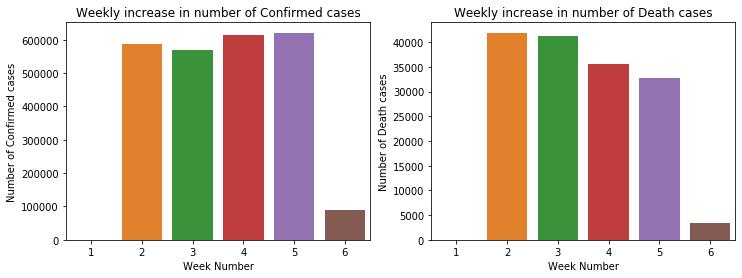

In [51]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x = week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x = week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed cases")
ax2.set_ylabel("Number of Death cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Death cases")
plt.show()

Average increase in number of confirmed cases everyday: 82495.0
Average increase in number of recovered cases everyday: 42218.0
Average increase in number of deaths cases everyday: 5159.0
Average increase in number of Serious or Critical cases everyday: -339.0


(array([737532., 737536., 737540., 737544., 737546., 737550., 737554.,
        737558., 737562.]),
 <a list of 9 Text xticklabel objects>)

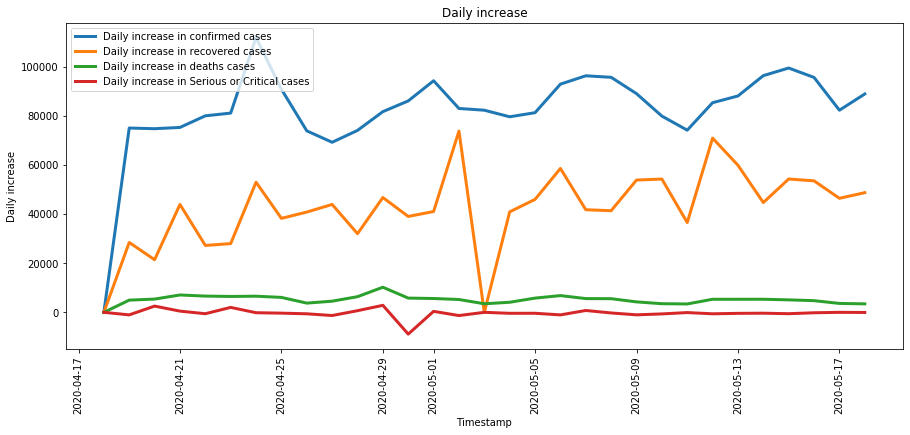

In [52]:
print("Average increase in number of confirmed cases everyday:",np.round(datewise["Total Cases"].diff().fillna(0).mean()))
print("Average increase in number of recovered cases everyday:",np.round(datewise["Total Recovered"].diff().fillna(0).mean()))
print("Average increase in number of deaths cases everyday:",np.round(datewise["Total Deaths"].diff().fillna(0).mean()))
print("Average increase in number of Serious or Critical cases everyday:",
      np.round(datewise["Serious or Critical"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["Total Cases"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Total Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Total Deaths"].diff().fillna(0),label="Daily increase in deaths cases",linewidth=3)
plt.plot(datewise["Serious or Critical"].diff().fillna(0),label="Daily increase in Serious or Critical cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)


In [53]:
# Calculating Country wise Mortality rate
countrywise = df_1[df_1["Date"]==df_1["Date"].max()].groupby(["Country"]).agg({"Total Tests":"sum","Total Cases":"sum","Total Deaths":"sum",
                                       "Total Deaths":"sum","Total Recovered":"sum","Serious or Critical":"sum",
                                       "Active Cases":"sum"}).sort_values(["Total Cases"],ascending=False)

In [54]:
countrywise

,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Country,,,,,,
USA,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0
Russia,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0
Spain,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0
Brazil,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0
UK,2682716.0,246406.0,34796.0,0.0,1559.0,0.0
...,...,...,...,...,...,...
Caribbean Netherlands,357.0,6.0,0.0,6.0,0.0,0.0
St. Barth,0.0,6.0,0.0,6.0,0.0,0.0
Anguilla,0.0,3.0,0.0,3.0,0.0,0.0


In [55]:
countrywise["Mortality"]=(countrywise["Total Deaths"]/countrywise["Total Recovered"])*100
countrywise["Recovered%"]=(countrywise["Total Recovered"]/countrywise["Total Cases"])*100

In [56]:
countrywise

,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Mortality,Recovered%
Country,,,,,,,,
USA,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,25.809592,22.988091
Russia,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,3.876996,24.153531
Spain,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,14.068482,70.800322
Brazil,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,16.775998,39.338915
UK,2682716.0,246406.0,34796.0,0.0,1559.0,0.0,inf,0.000000
...,...,...,...,...,...,...,...,...
Caribbean Netherlands,357.0,6.0,0.0,6.0,0.0,0.0,0.000000,100.000000
St. Barth,0.0,6.0,0.0,6.0,0.0,0.0,0.000000,100.000000
Anguilla,0.0,3.0,0.0,3.0,0.0,0.0,0.000000,100.000000


Text(0.5, 1.0, 'Top 15 countries as per number of death cases')

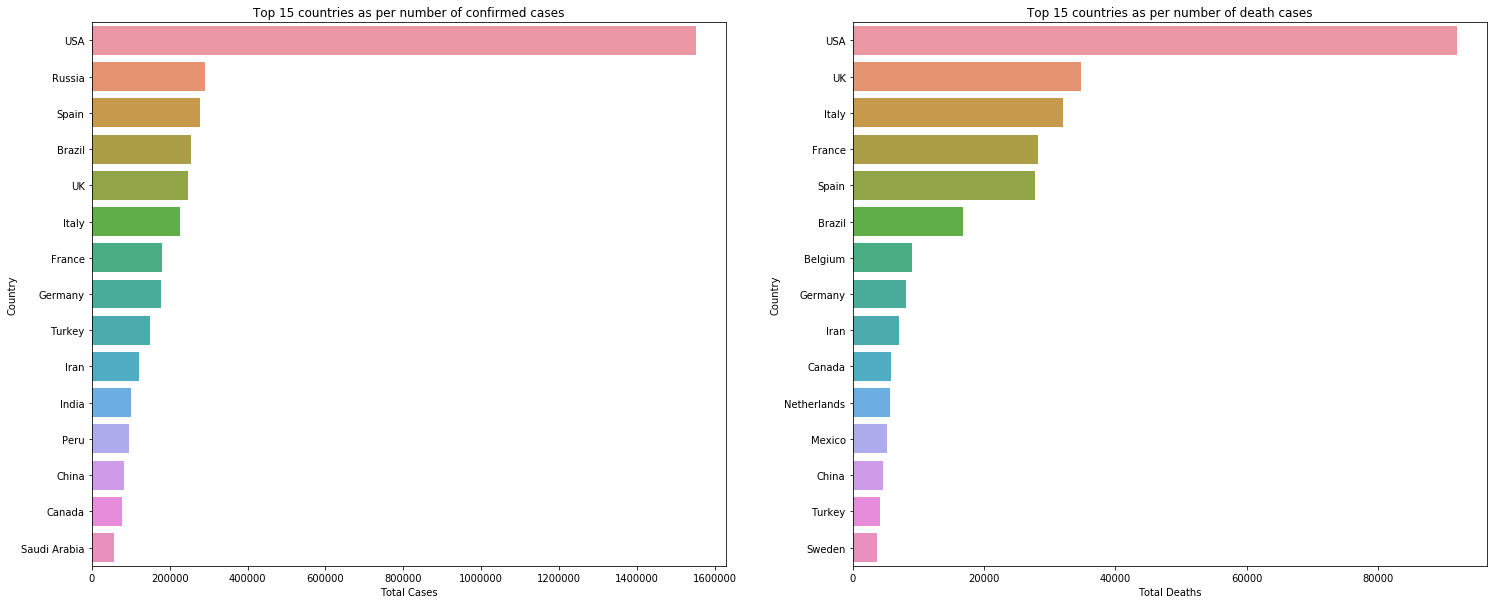

In [57]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(["Total Cases"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Total Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Total Cases"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Total Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per number of death cases")

In [59]:
# Data Analysis for India

india_data = df_1[df_1["Country"]=="India"]
datewise_india = india_data.groupby(["Date"]).agg({"Total Tests":"sum","Total Cases":"sum","Total Deaths":"sum",
                                       "Total Deaths":"sum","Total Recovered":"sum","Serious or Critical":"sum",
                                       "Active Cases":"sum"})
print(datewise_india.iloc[-1])
print("Total Active Cases",datewise_india["Active Cases"].iloc[-1])
print("Total Closed Cases",datewise_india["Total Recovered"].iloc[-1]+datewise_india["Total Deaths"].iloc[-1])

Total Tests            2302792.0
Total Cases             100328.0
Total Deaths              3156.0
Total Recovered          39233.0
Serious or Critical          0.0
Active Cases             57939.0
Name: 2020-05-18 00:00:00, dtype: float64
Total Active Cases 57939.0
Total Closed Cases 42389.0


In [60]:
# Data Analysis for USA

usa_data = df_1[df_1["Country"]=="USA"]
datewise_usa = usa_data.groupby(["Date"]).agg({"Total Tests":"sum","Total Cases":"sum","Total Deaths":"sum",
                                       "Total Deaths":"sum","Total Recovered":"sum","Serious or Critical":"sum",
                                       "Active Cases":"sum"})
print(datewise_usa.iloc[-1])
print("Total Active Cases",datewise_usa["Active Cases"].iloc[-1])
print("Total Closed Cases",datewise_usa["Total Recovered"].iloc[-1]+datewise_usa["Total Deaths"].iloc[-1])

Total Tests            12300744.0
Total Cases             1550294.0
Total Deaths              91981.0
Total Recovered          356383.0
Serious or Critical       16868.0
Active Cases            1101930.0
Name: 2020-05-18 00:00:00, dtype: float64
Total Active Cases 1101930.0
Total Closed Cases 448364.0


Text(0.5, 1.0, 'Weekly progress of different types of cases')

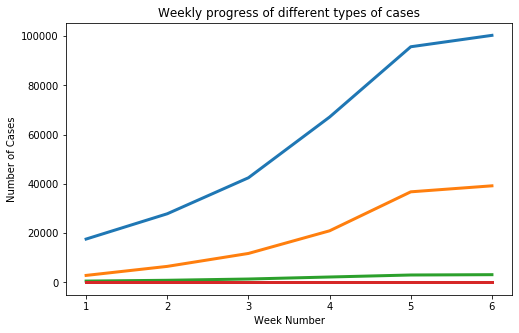

In [61]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear

india_week_num = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
india_weekwise_serious = []
w = 1

for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Total Cases"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Total Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Total Deaths"].iloc[-1])
    india_weekwise_serious.append(datewise_india[datewise_india["WeekofYear"]==i]["Serious or Critical"].iloc[-1])
    india_week_num.append(w)
    w=w+1

plt.figure(figsize=(8,5))
plt.plot(india_week_num,india_weekwise_confirmed,linewidth=3)
plt.plot(india_week_num,india_weekwise_recovered,linewidth=3)
plt.plot(india_week_num,india_weekwise_deaths,linewidth=3)
plt.plot(india_week_num,india_weekwise_serious,linewidth=3)
plt.xlabel("Week Number")
plt.ylabel("Number of Cases")
plt.title("Weekly progress of different types of cases")

In [67]:
datewise["Days Since"]=datewise.index-datewise.index[0]

In [68]:
datewise

,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,WeekofYear,Days Since
Date,,,,,,,,
2020-04-18,19847624.0,2330045.0,160032.0,595244.0,55258.0,1574175.0,16,0 days
2020-04-19,20565761.0,2405050.0,164994.0,623676.0,54218.0,1615786.0,16,1 days
2020-04-20,21597361.0,2479782.0,170382.0,645090.0,56756.0,1663716.0,17,2 days
2020-04-21,22614613.0,2555027.0,177444.0,688988.0,57247.0,1688001.0,17,3 days
2020-04-22,23334041.0,2634998.0,184051.0,716205.0,56682.0,1734148.0,17,4 days
2020-04-23,24427775.0,2716085.0,190513.0,744174.0,58692.0,1780804.0,17,5 days
2020-04-24,25574910.0,2827896.0,197076.0,797132.0,58527.0,1833094.0,17,6 days
2020-04-25,26861236.0,2918683.0,203149.0,835373.0,58198.0,1879567.0,17,7 days
2020-04-26,27975924.0,2992542.0,206900.0,876172.0,57596.0,1908876.0,17,8 days


In [69]:
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]
mdoel_scores = []

In [75]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel="poly",epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Total Deaths"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Total Deaths"]).reshape(-1,1))            

SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [76]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_lin_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [85]:
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])    

pd.set_option("display.float_format",lambda x: '%.f'%x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(10)

,Dates,LR,SVR
0,2020-05-19,333408,410313
1,2020-05-20,338893,441852
2,2020-05-21,344379,477590
3,2020-05-22,349864,517933
4,2020-05-23,355349,563312
5,2020-05-24,360835,614183
6,2020-05-25,366320,671033
7,2020-05-26,371805,734372
8,2020-05-27,377291,804741
9,2020-05-28,382776,882710


# Time Series Analysis

In [80]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]

In [83]:
holt=Holt(np.asarray(model_train["Total Cases"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

In [86]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])
    
model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,LR,SVR,Holts Linear Model Prediction
0,2020-05-19,333408,410313,4937194
1,2020-05-20,338893,441852,5022514
2,2020-05-21,344379,477590,5107834
3,2020-05-22,349864,517933,5193153
4,2020-05-23,355349,563312,5278473
